#**Prediksi Tingkat Resiko Penyebaran Covid-19 pada Pulau Sumatera Menggunakan Metode K-NN dan SVM**

>Fadhilah Nur Amaliah

> Ghifary Catur Achmad

> Mohammad Luthfan Faohan

> Naila Ameera Larasati

> Nova Nurul Putri











##Import library

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate,cross_val_score,train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


##Menghubungkan colab dengan google drive dan mengimport dataset covid_sumatera 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("drive/MyDrive/Project Orbit/covid_sumatera.csv")

# Menampilkan shape dari data yg kita punya
dataset.head(10)

,kota_kabupaten,kasus_positif_total,total_meninggal,masih_sakit,total_sembuh,tingkat_resiko
0,Kota Padang,25.421,424.0,1.0,24.996,Resiko Tinggi
1,Kab. Agam,4.475,115.0,104.0,4.256,Resiko Tinggi
2,Kab. Tanah Datar,2.818,87.0,64.0,2.667,Resiko Rendah
3,Kota Bukittinggi,2.566,52.0,26.0,2.488,Resiko Rendah
4,Kab. Padang Pariaman,2.148,93.0,78.0,1.977,Resiko Tinggi
5,Kab. Pesisir Selatan,2.127,68.0,53.0,2.006,Resiko Rendah
6,Kab. Solok,2.052,70.0,52.0,1.930,Resiko Rendah
7,Kab. Limapuluh Kota,1.768,49.0,33.0,1.686,Resiko Rendah
8,Kota Payakumbuh,1.672,28.0,13.0,1.631,Resiko Rendah
9,Kota Padang Panjang,1.666,31.0,11.0,1.624,Resiko Rendah


In [ ]:
dataset.shape

(150, 6)

In [ ]:
df = dataset.drop(['kota_kabupaten'], axis = 1)
df

,kasus_positif_total,total_meninggal,masih_sakit,total_sembuh,tingkat_resiko
0,25.421,424.0,1.0,24.996,Resiko Tinggi
1,4.475,115.0,104.0,4.256,Resiko Tinggi
2,2.818,87.0,64.0,2.667,Resiko Rendah
3,2.566,52.0,26.0,2.488,Resiko Rendah
4,2.148,93.0,78.0,1.977,Resiko Tinggi
...,...,...,...,...,...
145,1.131,32.0,0.0,1.099,Resiko Tinggi
146,1.098,34.0,0.0,1.064,Resiko Tinggi
147,859.000,26.0,3.0,830.000,Resiko Tinggi
148,830.000,4.0,0.0,826.000,Resiko Rendah


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encode untuk data kategorikal kolom kota/kabupaten

labelencoder = LabelEncoder()
df['tingkat_resiko'] = labelencoder.fit_transform(df['tingkat_resiko'])
df

,kasus_positif_total,total_meninggal,masih_sakit,total_sembuh,tingkat_resiko
0,25.421,424.0,1.0,24.996,1
1,4.475,115.0,104.0,4.256,1
2,2.818,87.0,64.0,2.667,0
3,2.566,52.0,26.0,2.488,0
4,2.148,93.0,78.0,1.977,1
...,...,...,...,...,...
145,1.131,32.0,0.0,1.099,1
146,1.098,34.0,0.0,1.064,1
147,859.000,26.0,3.0,830.000,1
148,830.000,4.0,0.0,826.000,0


In [ ]:
df['tingkat_resiko'].value_counts()

0    106
1     44
Name: tingkat_resiko, dtype: int64

##Pembagian antara data Fitur dan Label. Dari data Sumatera di atas, terdapat 4 kolom fitur (data source(x)) yang terdiri dari kota_kabupaten kasus_positif_total, total_meninggal, masih_sakit dan total_sembuh. Sedangkan data Label terdiri 1 kolom (data target(y)) yang berupa kolom tingkat_resiko

In [ ]:
# Type Your Code
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values

In [ ]:
# # Type Your Code
# print ('Fitur (X):', X)
# print ('\n---------------------------------')
# print ('\nLabel (Y):', Y)

## Membagi dataset menjadi training set (80%) dan validation set (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

> X_train: Untuk menampung data source yang akan dilatih.

> X_test: Untuk menampung data target yang akan dilatih.

> y_train: Untuk menampung data source yang akan digunakan untuk testing.

> y_test: Untuk menampung data target yang akan digunakan untuk testing.









In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Melakukan Normalisasi Data

## Normalisasi data dapat dilakukan dengan menggunakan class StandarScaler. Normalisasi data dilakukan agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit and transform the training set
X_train = scaler.fit_transform(X_train)

# fit the test set
X_test = scaler.transform(X_test)


#Modelling KNN

In [ ]:
# import knn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

#create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)
#3, 4, 5, 6

#Train the model using the training sets
knn.fit(X_train, Y_train)

# Predict
y_predict = knn.predict(X_test)

#Confusion Matrix


confusion matrix / error matrix, membandingkan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Untuk mengukur performance metrics dari confusion matrix, dapat digunakna accuracy, precission dan recall.

> Accuracy: Tingkat kedekatan nilai prediksi dengan nilai aktual (sebenarnya). Dari nilai accuracy, kita dapat menngetahui berapa persen kota yang benar diprediksi masuk kategori tingkat resiko rendah maupun tinggi.


> Precission: rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif. Dari nilai Precision, kita dapat mengetahui berapa persen kota/kabupaten yang benar masuk dalam tingkat penyebaran dengan resiko tinggi dari seluruh kota/kabupaten yang diprediksi masuk ke kategori resiko tinggi.



> Recall: rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Dengan nilai Recall, kita dapat mengetahui berapa persen kota/kab yang diprediksi masuk tingkat resiko tinggi dibandingkan keseluruhan kota/kab yang sebenarnya masuk dalam resiko tinggi. 







In [ ]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(Y_test, y_predict) 

In [ ]:
#Import Module
from sklearn import metrics

#Show the Confusion Matrix
cm_knn = metrics.confusion_matrix(Y_test, y_predict)
cm_knn

array([[19,  0],
       [ 6,  5]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(Y_test, y_predict)
prec_knn = metrics.precision_score(Y_test, y_predict, average='weighted')
rec_knn = metrics.recall_score(Y_test, y_predict, average='weighted')
f1_knn = metrics.f1_score(Y_test, y_predict, average='weighted')
kappa_knn = metrics.cohen_kappa_score(Y_test, y_predict)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.8
Precision: 0.848
Recall: 0.8
F1 Score: 0.7761363636363636
Cohens Kappa Score: 0.5135135135135135


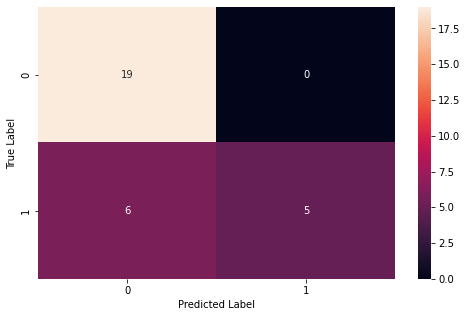

In [ ]:
#memvisualisasikan confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(Y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print (classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.45      0.62        11

    accuracy                           0.80        30
   macro avg       0.88      0.73      0.74        30
weighted avg       0.85      0.80      0.78        30



##Modelling SVM 


In [ ]:
#import svm model
from sklearn import svm

#create a scm Classifier
clf = svm.SVC(kernel='poly') #Linear Kernel
#RBF, Polynomial, Sigmoid

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(Y_test, y_pred_svm)

array([[19,  0],
       [ 7,  4]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_svm = metrics.accuracy_score(Y_test,y_pred_svm)
prec_svm = metrics.precision_score(Y_test,y_pred_svm, average='weighted')
rec_svm = metrics.recall_score(Y_test,y_pred_svm, average='weighted')
f1_svm = metrics.f1_score(Y_test,y_pred_svm, average='weighted')
kappa_svm = metrics.cohen_kappa_score(Y_test,y_pred_svm)

print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)
print("Cohens Kappa Score:", kappa_svm)

Accuracy: 0.7666666666666667
Precision: 0.8294871794871794
Recall: 0.7666666666666667
F1 Score: 0.7303703703703702
Cohens Kappa Score: 0.419889502762431


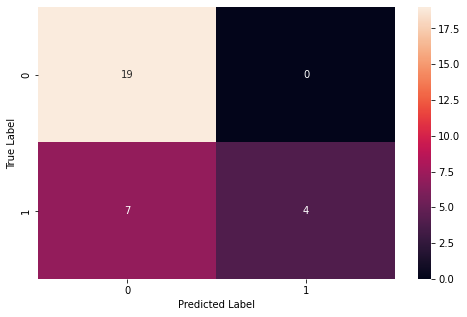

In [ ]:
#memvisualisasikan confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(Y_test, y_pred_svm), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.36      0.53        11

    accuracy                           0.77        30
   macro avg       0.87      0.68      0.69        30
weighted avg       0.83      0.77      0.73        30

